In [4]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import random 
import sorting
np.random.seed(73)

# 1

In [10]:
def count_time(fun, lim=2001, **kwargs):
    """ a function for time counting """
    l =[]
    for i in range(5):
        s=0
        for t in range(1, lim):
            v = np.random.randint(1, 50, t)
            start_time = time()
            fun(v, **kwargs)
            end_time = time()
            l.append(end_time - start_time)
        
    
    return np.mean(np.array(l),1) #returns average time for 5 runs

In [4]:
# constant

def f1(v): return 1

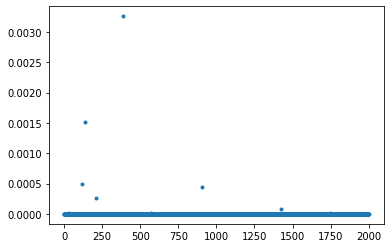

In [6]:
plt.plot(count_time(f1, 2001), '.')

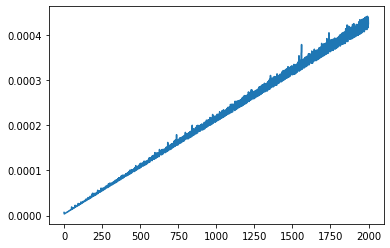

In [6]:
# summation
plt.plot(count_time(sum))

In [0]:
# multiplication
def mul(v):
    f3 = np.ones_like(v, dtype=np.float128)
    f3[0] = v[0]
    for i in range(1, len(v)):
        f3[i] = f3[i-1] * v[i]
    return f3[-1]

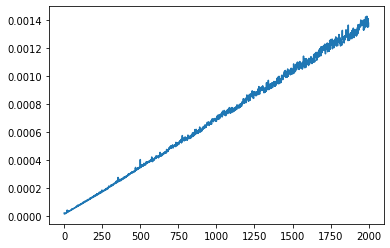

In [4]:
plt.plot(count_time(mul))

In [6]:
# polynomial 

def Horner(v,x):
    p = 0.0
    for i in v[-1::-1]:
        p = p*x+i
    return p

def naive(v,x):
    # n = len(c)
    p = np.ones_like(v, dtype=np.float128)
    for i in range(len(v)):
        p[i] = v[i]*x**i 
    return p[-1]

<ipython-input-32-95858cb3cd93>:4: RuntimeWarning: overflow encountered in double_scalars
  p = p*x+i


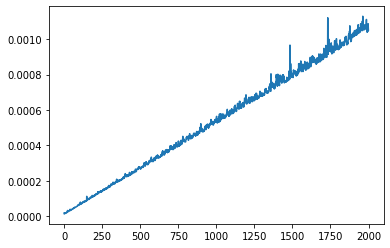

In [48]:
# oops overflow
plt.plot(count_time(Horner, x=1.5))

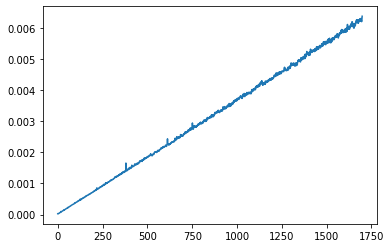

In [11]:
plt.plot(count_time(naive, 1700, x=1.5))

In [38]:
# 5
def bubblesort(v):
    for i in range(len(v)-1):
        for j in range(len(v)-i-1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
    return v

In [19]:
n=5
avg_merge=np.zeros((n, 1998))
for t in range(n):
    merge_time=[]
    for i in range(2, 2000):
        ar = np.random.randint(0, 1000, i)
        start = time()
        sorting.bubble(ar)
        merge_time.append(time() - start)
    avg_merge[t]=merge_time

In [41]:
avg_merge[:,1950].mean()

2.983389663696289

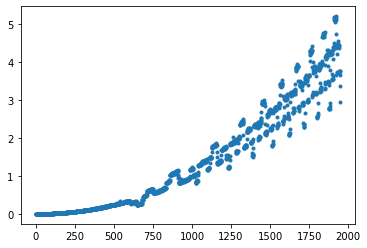

In [42]:
plt.plot(avg_merge.mean(0)[:1950], '.')

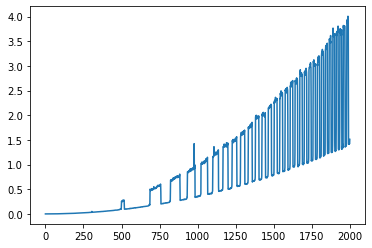

In [19]:
plt.plot(count_time(bubblesort))

In [14]:
# 6
def quicksort(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = np.random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n < q:
               s_nums.append(n)
           elif n > q:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return quicksort(s_nums) + e_nums + quicksort(m_nums)
   
#quicksort(v)

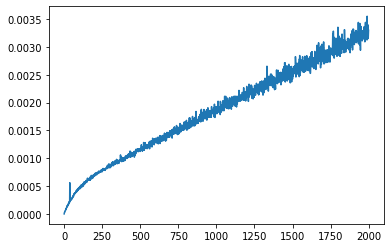

In [15]:
plt.plot(count_time(quicksort))

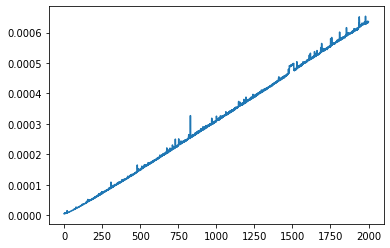

In [43]:
# 7 timsort
plt.plot(count_time(sorted))

# 2

In [7]:
def count_time_m(lim=350):
    l =[]
    for i in range(1, lim):
        #v = np.random.randint(1, 50, i)
        s=0
        a = np.random.randint(1, 50, (i, i))
        b = np.random.randint(1, 50, (i, i))
        for t in range(5):
            
            start_time = time()
            a @ b
            end_time = time()
            s = s + end_time - start_time
        l.append(s/5)
    
    return l

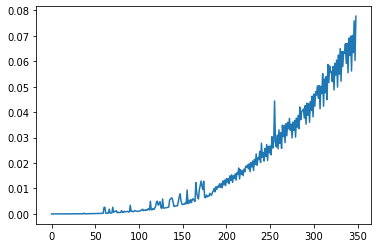

In [8]:
plt.plot(count_time_m(350))

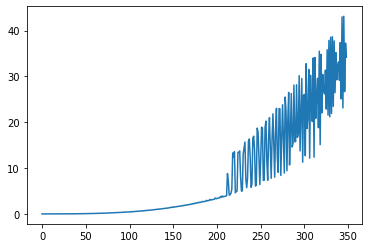

In [67]:
plt.plot(count_time_m(matmult)) # realization from scratch